In [3]:
import glob
import os
import pandas as pd
import chardet
import statsmodels.api as sm
import statsmodels.formula.api as smf

from statsmodels.tsa.stattools import coint, adfuller
from statsmodels.graphics.regressionplots import abline_plot
import matplotlib
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import numpy as np
from numpy import random
from sklearn.linear_model import LinearRegression, Lasso, Ridge
import seaborn as sns
from pandas import Series
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.kernel_ridge import KernelRidge


%matplotlib inline
rndseed = 12345

In [4]:
print(glob.glob('data/CO2_passenger_cars_v*.csv'))

['data/CO2_passenger_cars_v10.csv', 'data/CO2_passenger_cars_v9.csv', 'data/CO2_passenger_cars_v8.csv', 'data/CO2_passenger_cars_v5.csv', 'data/CO2_passenger_cars_v11.csv', 'data/CO2_passenger_cars_v13.csv', 'data/CO2_passenger_cars_v4.csv', 'data/CO2_passenger_cars_v7.csv', 'data/CO2_passenger_cars_v12.csv', 'data/CO2_passenger_cars_v6.csv', 'data/CO2_passenger_cars_v14.csv']


## Use dataset from 2011-2016

In [5]:
cols = ['e (g/km)','m (kg)','w (mm)','at1 (mm)','at2 (mm)','ec (cm3)','ep (KW)', 'MP','Ft','MS']

In [6]:
with open('data/CO2_passenger_cars_v14.csv', 'rb') as f:
    result = chardet.detect(f.read())
result['encoding']
data_16 = pd.read_csv('data/CO2_passenger_cars_v14.csv', sep='\t', encoding=result['encoding'], usecols=cols)

In [7]:
data_16['year'] = 2016
data_16.head()

,MS,MP,e (g/km),m (kg),w (mm),at1 (mm),at2 (mm),Ft,ec (cm3),ep (KW),year
0,DK,DAIMLER AG,158.0,2145.0,3200.0,1666.0,1646.0,Diesel,2143.0,140.0,2016
1,DK,DAIMLER AG,158.0,1985.0,3200.0,1666.0,1646.0,Diesel,2143.0,100.0,2016
2,DK,DAIMLER AG,158.0,2170.0,3430.0,1666.0,1646.0,Diesel,2143.0,140.0,2016
3,DK,DAIMLER AG,154.0,2105.0,3200.0,1666.0,1646.0,Diesel,2143.0,120.0,2016
4,DK,DAIMLER AG,177.0,2210.0,3200.0,1666.0,1646.0,Diesel,2143.0,140.0,2016


In [8]:
with open('data/CO2_passenger_cars_v12.csv', 'rb') as f:
    result = chardet.detect(f.read())
result['encoding']

data_15 = pd.read_csv('data/CO2_passenger_cars_v12.csv', sep='\t', encoding=result['encoding'], usecols=cols)
#data_12.head()

In [9]:
data_15['year'] = 2015
data_15.head()

,MS,MP,e (g/km),m (kg),w (mm),at1 (mm),at2 (mm),Ft,ec (cm3),ep (KW),year
0,LU,VW GROUP PC,119.0,1376.0,2620.0,1527.0,1496.0,DIESEL,1968.0,110.0,2015
1,LU,VW GROUP PC,145.0,1392.0,2626.0,1527.0,1496.0,PETROL,1984.0,162.0,2015
2,LU,VW GROUP PC,209.0,2356.0,3665.0,1710.0,1716.0,DIESEL,1968.0,120.0,2015
3,LU,VW GROUP PC,148.0,1468.0,2538.0,1570.0,1548.0,PETROL,1390.0,118.0,2015
4,LU,VW GROUP PC,140.0,1411.0,2524.0,1570.0,1546.0,DIESEL,1968.0,103.0,2015


In [10]:
with open('data/CO2_passenger_cars_v10.csv', 'rb') as f:
    result = chardet.detect(f.read())
result['encoding']
data_14 = pd.read_csv('data/CO2_passenger_cars_v10.csv', sep='\t', encoding=result['encoding'], usecols=cols)

In [11]:
data_14['year'] = 2014
data_14.head()

,MS,MP,e (g/km),m (kg),w (mm),at1 (mm),at2 (mm),Ft,ec (cm3),ep (KW),year
0,AT,na,218.0,1406.0,2415.0,1543.0,1561.0,Petrol,1998.0,194.0,2014
1,AT,na,264.0,2195.0,3122.0,1652.0,1643.0,Petrol,6299.0,368.0,2014
2,AT,na,282.0,2370.0,3013.0,1653.0,1695.0,Diesel,2967.0,171.0,2014
3,AT,na,NaN,1840.0,2805.0,1583.0,1574.0,Petrol,1984.0,220.0,2014
4,AT,na,165.0,1695.0,2594.0,1555.0,1526.0,Petrol,1984.0,221.0,2014


In [12]:
with open('data/CO2_passenger_cars_v8.csv', 'rb') as f:
    result = chardet.detect(f.read())
result['encoding']
data_13 = pd.read_csv('data/CO2_passenger_cars_v8.csv', sep='\t', encoding=result['encoding'], usecols=cols)

In [13]:
data_13['year'] = 2013
data_13.head()

,MS,MP,e (g/km),m (kg),w (mm),at1 (mm),at2 (mm),Ft,ec (cm3),ep (KW),year
0,AT,NaN,NaN,2260.0,3122.0,1652.0,1643.0,Petrol,3993.0,412.0,2013
1,AT,NaN,277.0,2130.0,3122.0,1652.0,1643.0,Petrol,6299.0,368.0,2013
2,AT,NaN,216.0,2020.0,3100.0,1652.0,1643.0,Petrol,3993.0,320.0,2013
3,AT,NaN,112.0,1395.0,2578.0,1522.0,1515.0,Diesel,1598.0,77.0,2013
4,AT,NaN,152.0,1470.0,2618.0,1555.0,1526.0,Petrol,1798.0,132.0,2013


In [14]:
with open('data/CO2_passenger_cars_v6.csv', 'rb') as f:
    result = chardet.detect(f.read())
result['encoding']
data_12 = pd.read_csv('data/CO2_passenger_cars_v6.csv', sep='\t', encoding=result['encoding'], usecols=cols)

In [15]:
data_12['year'] = 2012
data_12.head()

,MS,e (g/km),m (kg),w (mm),at1 (mm),at2 (mm),Ft,ec (cm3),ep (KW),MP,year
0,AT,0.0,1515.0,2400.0,1325.0,1305.0,Electric,NaN,20.0,NaN,2012
1,AT,183.0,575.0,2310.0,1320.0,1375.0,Petrol,1340.0,145.0,NaN,2012
2,AT,270.0,1795.0,2850.0,1535.0,1535.0,Petrol,2351.0,92.0,NaN,2012
3,AT,312.0,2000.0,2820.0,1566.0,1566.0,Petrol,4163.0,331.0,NaN,2012
4,AT,229.0,1870.0,2910.0,1662.0,1663.0,Petrol,3993.0,412.0,NaN,2012


In [16]:
with open('data/CO2_passenger_cars_v4.csv', 'rb') as f:
    result = chardet.detect(f.read())
result['encoding']
data_11 = pd.read_csv('data/CO2_passenger_cars_v4.csv', sep='\t', encoding=result['encoding'], usecols=cols)

In [17]:
data_11['year'] = 2011
data_11.head()

,MP,MS,e (g/km),m (kg),w (mm),at1 (mm),at2 (mm),Ft,ec (cm3),ep (KW),year
0,NaN,AT,155.0,1240.0,2452.0,1468.0,1471.0,Petrol,1598.0,NaN,2011
1,NaN,AT,314.0,1225.0,2575.0,1537.0,1575.0,Petrol,5666.0,NaN,2011
2,NaN,AT,0.0,1415.0,1810.0,1220.0,1220.0,Electric,NaN,NaN,2011
3,NaN,AT,NaN,1788.0,2620.0,1565.0,1565.0,Diesel,2199.0,NaN,2011
4,NaN,AT,NaN,1727.0,2620.0,1565.0,1565.0,Diesel,2199.0,NaN,2011


In [18]:
data = [data_12,data_13,data_14,data_15,data_16]

In [19]:
df = data_11.append(data)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [35]:
df.head()

,Ft,MP,MS,at1 (mm),at2 (mm),e (g/km),ec (cm3),ep (KW),m (kg),w (mm),year
0,Petrol,NaN,AT,1468.0,1471.0,155.0,1598.0,NaN,1240.0,2452.0,2011
1,Petrol,NaN,AT,1537.0,1575.0,314.0,5666.0,NaN,1225.0,2575.0,2011
2,Electric,NaN,AT,1220.0,1220.0,0.0,NaN,NaN,1415.0,1810.0,2011
3,Diesel,NaN,AT,1565.0,1565.0,NaN,2199.0,NaN,1788.0,2620.0,2011
4,Diesel,NaN,AT,1565.0,1565.0,NaN,2199.0,NaN,1727.0,2620.0,2011


In [36]:
pvco2 = df.copy()

In [37]:
pvco2.to_csv('pv_co2.csv', sep='\t')

In [23]:
co2_df = df.copy()

In [24]:
co2_df.shape

(2509155, 11)

In [25]:
co2_df = co2_df.drop_duplicates()

In [30]:
co2_df.shape

(990751, 11)

In [31]:
co2_df.isnull().any()

Ft           True
MP           True
MS          False
at1 (mm)     True
at2 (mm)     True
e (g/km)     True
ec (cm3)     True
ep (KW)      True
m (kg)       True
w (mm)       True
year        False
dtype: bool

In [32]:
co2_df.to_csv('co2.csv', sep='\t')

In [25]:
df = df.rename(columns={'e (g/km)': 'emission',
                              'm (kg)': 'mass', 
                              'w (mm)': 'wheel', 
                              'ep (KW)': 'eng_pow'})

In [26]:
df.head()

,emission,mass,wheel,eng_pow,year
0,155.0,1240.0,2452.0,NaN,2011
1,314.0,1225.0,2575.0,NaN,2011
2,0.0,1415.0,1810.0,NaN,2011
3,NaN,1788.0,2620.0,NaN,2011
4,NaN,1727.0,2620.0,NaN,2011


In [27]:
df.isnull().any()

emission     True
mass         True
wheel        True
eng_pow      True
year        False
dtype: bool

In [28]:
num_cols=['emission','mass','wheel','eng_pow']

In [29]:
df = df.apply(lambda x: x.fillna(x.mean()), axis=0)

In [30]:
df.isnull().any()

emission    False
mass        False
wheel       False
eng_pow     False
year        False
dtype: bool

In [1]:
df.head()

NameError: name 'df' is not defined

In [32]:
df.describe(include='all')

,emission,mass,wheel,eng_pow,year
count,2.509155e+06,2.509155e+06,2.509155e+06,2.509155e+06,2.509155e+06
mean,1.405333e+02,1.536619e+03,2.703337e+03,1.145390e+02,2.013689e+03
std,3.869348e+01,3.224027e+02,2.152864e+02,5.191623e+01,1.689926e+00
min,0.000000e+00,3.000000e+02,2.430000e+02,0.000000e+00,2.011000e+03
25%,1.160000e+02,1.320000e+03,2.600000e+03,8.400000e+01,2.012000e+03
50%,1.340000e+02,1.503000e+03,2.685000e+03,1.100000e+02,2.014000e+03
75%,1.560000e+02,1.701000e+03,2.789000e+03,1.200000e+02,2.015000e+03
max,9.800000e+02,6.500000e+03,6.100000e+03,1.770000e+03,2.016000e+03


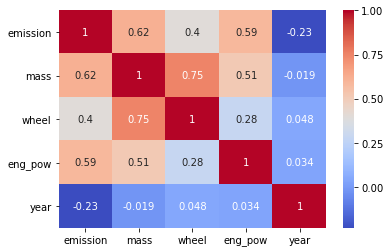

In [33]:
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)

## Time series Visualization on features

In [34]:
np.random.seed(999)
df['month'] = np.random.randint(1,13,df.shape[0])
df['day'] = np.random.randint(1,29, df.shape[0])

In [35]:
df.head()

,emission,mass,wheel,eng_pow,year,month,day
0,155.000000,1240.0,2452.0,114.53899,2011,1,28
1,314.000000,1225.0,2575.0,114.53899,2011,6,20
2,0.000000,1415.0,1810.0,114.53899,2011,2,20
3,140.533296,1788.0,2620.0,114.53899,2011,9,23
4,140.533296,1727.0,2620.0,114.53899,2011,2,23


In [36]:
df.index = pd.to_datetime(df[['year','month','day']])



#df.index = pd.to_datetime(df['year'].astype(str) + df['Month'] + df, format='%Y-%B')

In [37]:
df.head()

,emission,mass,wheel,eng_pow,year,month,day
2011-01-28,155.000000,1240.0,2452.0,114.53899,2011,1,28
2011-06-20,314.000000,1225.0,2575.0,114.53899,2011,6,20
2011-02-20,0.000000,1415.0,1810.0,114.53899,2011,2,20
2011-09-23,140.533296,1788.0,2620.0,114.53899,2011,9,23
2011-02-23,140.533296,1727.0,2620.0,114.53899,2011,2,23


In [38]:
df.to_csv('output.csv',sep='\t')

In [352]:
emission_mean = df.emission.resample('M').mean()
emission_sum = df.emission.resample('M').sum()
mass_mean = df.mass.resample('M').mean()
wheel = df.wheel.resample('M').mean()
eng_pow = df.eng_pow.resample('M').mean()

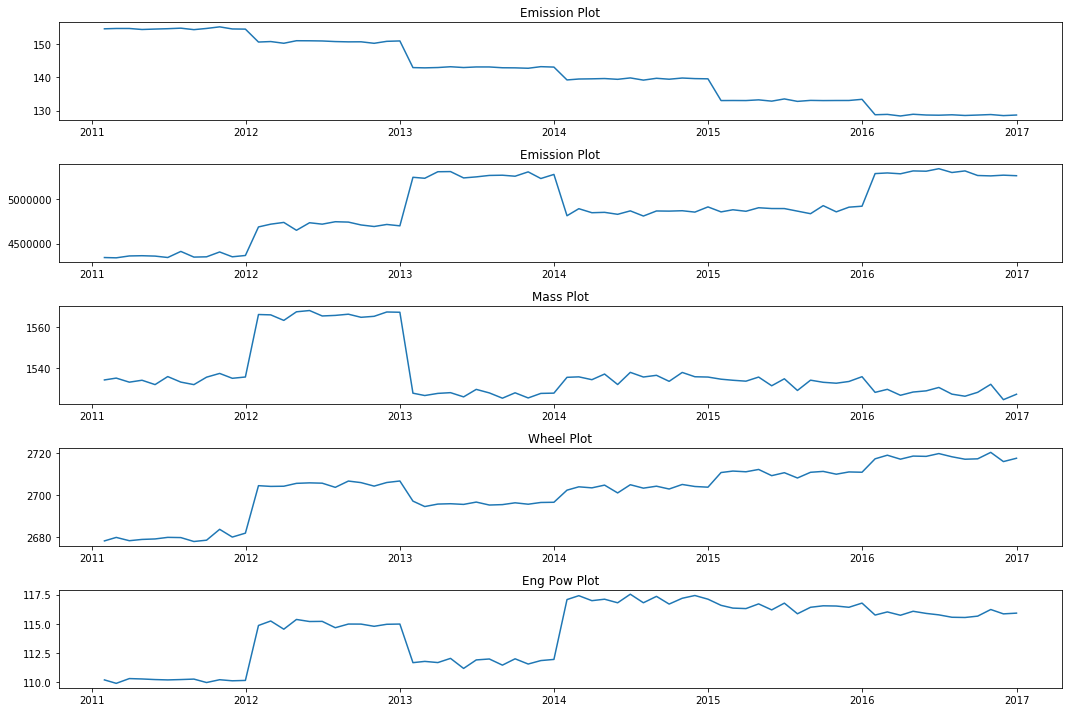

In [359]:
def tm_plot(func, series1, series2, series3,series4,series5):
    fig, ax = plt.subplots(2,figsize=(15,10))
    
    plt.subplot(511)
    func(series1)
    plt.title('{} {}'.format(series1.name, func.__name__).replace('_', ' ').title())
    
    plt.subplot(512)
    func(series2)
    plt.title('{} {}'.format(series2.name, func.__name__).replace('_', ' ').title())

    plt.subplot(513)
    func(series3)
    plt.title('{} {}'.format(series3.name, func.__name__).replace('_', ' ').title())

    plt.subplot(514)
    func(series4)
    plt.title('{} {}'.format(series4.name, func.__name__).replace('_', ' ').title())

    plt.subplot(515)
    func(series5)
    plt.title('{} {}'.format(series5.name, func.__name__).replace('_', ' ').title())

    plt.tight_layout()
    plt.show()
    
tm_plot(plt.plot, emission_mean, emission_sum, mass_mean, wheel, eng_pow)


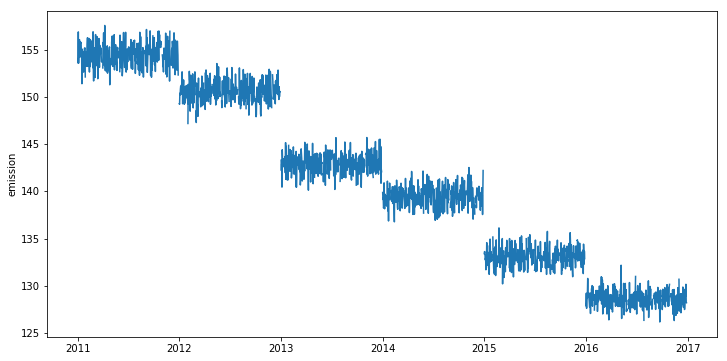

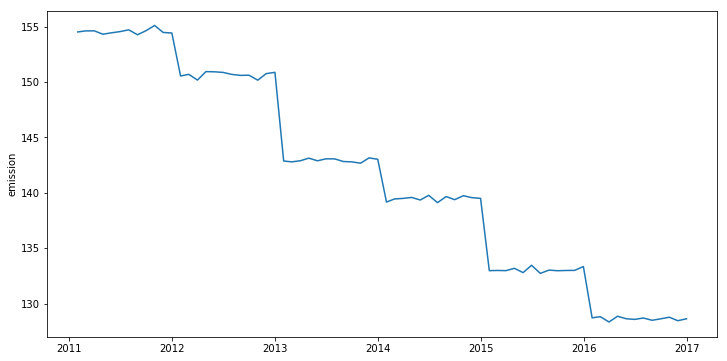

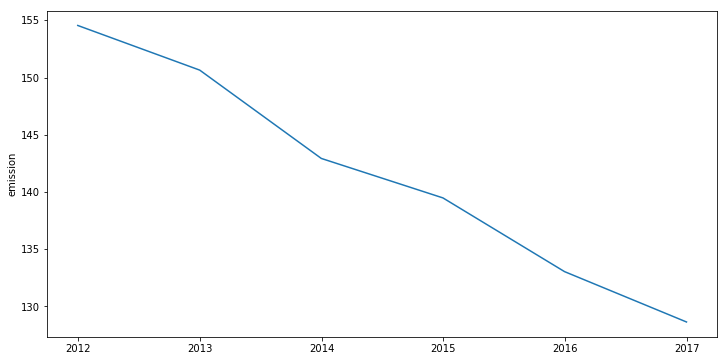

In [366]:
#count the average emission and see the trend from 2011-2016
#years = [2011,2012,2013,2014,2015,2016]
#target = [130,130,130,130,130,130]
emission_mean = df.emission.resample('D').mean()
plt.figure(figsize=(12,6))
plt.plot(emission_mean)
plt.ylabel('emission')
plt.show()

plt.figure(figsize=(12,6))
plt.plot(df.emission.resample('M').mean())
plt.ylabel('emission')
plt.show()

plt.figure(figsize=(12,6))
plt.plot(df.emission.resample('Y').mean())
plt.ylabel('emission')
plt.show()
#df.emission.resample('M').sum().plot()
#plt.ylabel('emission')
#plt.show()

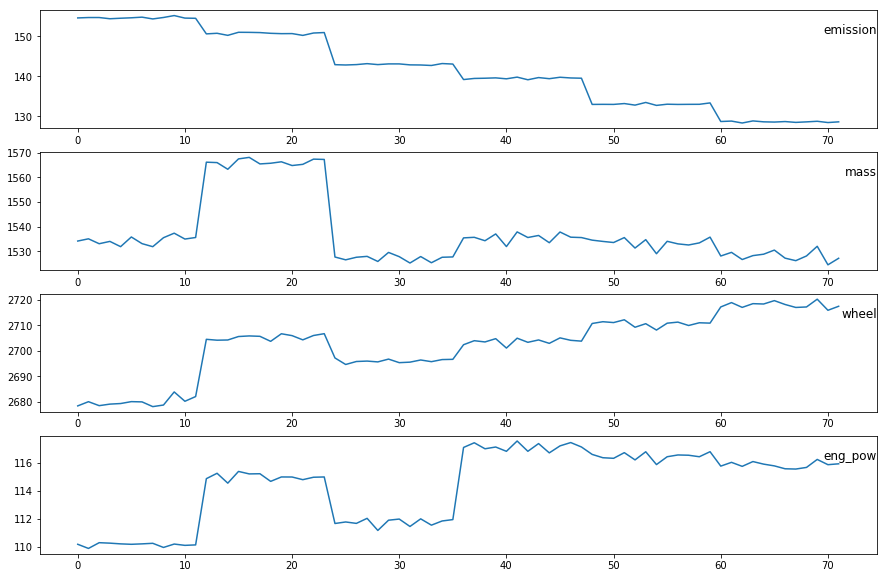

In [358]:
cols = [0,1,2,3]
i = 1
groups = cols
values = df.resample('M').mean().values

plt.figure(figsize=(15,10))
for group in groups:
    plt.subplot(len(cols), 1, i)
    plt.plot(values[:, group])
    plt.title(df.columns[group], y=0.75, loc='right')
    i += 1
plt.show()

## test stationary

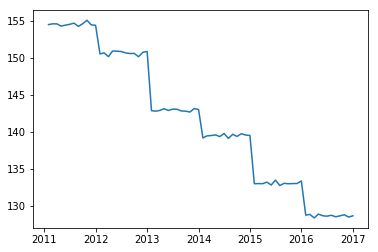

In [369]:
plt.plot(df.emission.resample('M').mean())

decreasing trend from 2011 to 2017

## ARIMA models

## Apply SVM

In [361]:
autocorrelation_plot(Series.df.emission)

NameError: name 'autocorrelation_plot' is not defined

In [339]:
df.head()

,emission,mass,wheel,eng_pow,year,month,day
2011-01-28,155.000000,1240.0,2452.0,114.53899,2011,1,28
2011-06-20,314.000000,1225.0,2575.0,114.53899,2011,6,20
2011-02-20,0.000000,1415.0,1810.0,114.53899,2011,2,20
2011-09-23,140.533296,1788.0,2620.0,114.53899,2011,9,23
2011-02-23,140.533296,1727.0,2620.0,114.53899,2011,2,23


In [305]:
years = [2011,2012,2013,2014,2015,2016]
plt.figure(figsize=(12,6))
plt.scatter(date, df.emission.resample('M').mean(), s=150,alpha=0.6,edgecolors='none',cmap='viridis')
plt.legend(loc='best')
plt.grid(True)
plt.title([2011,2016])
plt.show()

NameError: name 'date' is not defined

In [248]:
svr_rbf = SVR(kernel='rbf')
svr_lin = SVR(kernel='linear')

In [251]:
year = np.arange(2011, 2017)

In [252]:
future = np.arange(2011, 2021)
y_rbf = svr_rbf.fit(year[:, np.newaxis], df.emission.resample('Y').mean()).predict(future[:, np.newaxis])

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [255]:
y_lin = svr_lin.fit(year[:, np.newaxis], df.emission.resample('Y').mean()).predict(future[:, np.newaxis])

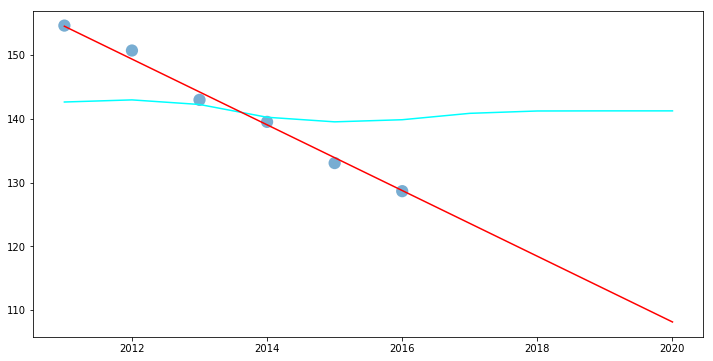

In [256]:
plt.figure(figsize=(12,6))
plt.scatter(year, df.emission.resample('Y').mean(), s = 150, alpha=0.6, edgecolors='none', cmap='viridis')
plt.plot(future, y_rbf, c='cyan', label='SVR RBF Model')
plt.plot(future, y_lin, c='red', label='SVR lin Model')

plt.show()